In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
gender_dict= {
    'Male' : 1,
    'Female' : 2
}
data['Gender_num']= data['Gender'].map(gender_dict)

In [5]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_num
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [6]:
data.drop(['Gender'],axis=1, inplace=True)

In [7]:
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_num
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,2
3,4,23,16,77,2
4,5,31,17,40,2
...,...,...,...,...,...
195,196,35,120,79,2
196,197,45,126,28,2
197,198,32,126,74,1
198,199,32,137,18,1


In [8]:
x=data[['Annual Income (k$)','Spending Score (1-100)']]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

In [9]:
x_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

C:\Users\elias\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elias\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elias\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elias\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

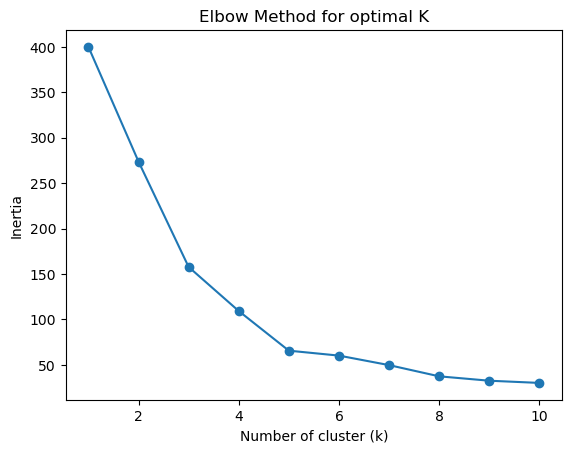

In [10]:
inertia=[]
k_range= range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(k_range,inertia,marker='o')
plt.xlabel('Number of cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal K')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster']=kmeans.fit_predict(x_scaled)
centroids = kmeans.cluster_centers_

C:\Users\elias\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


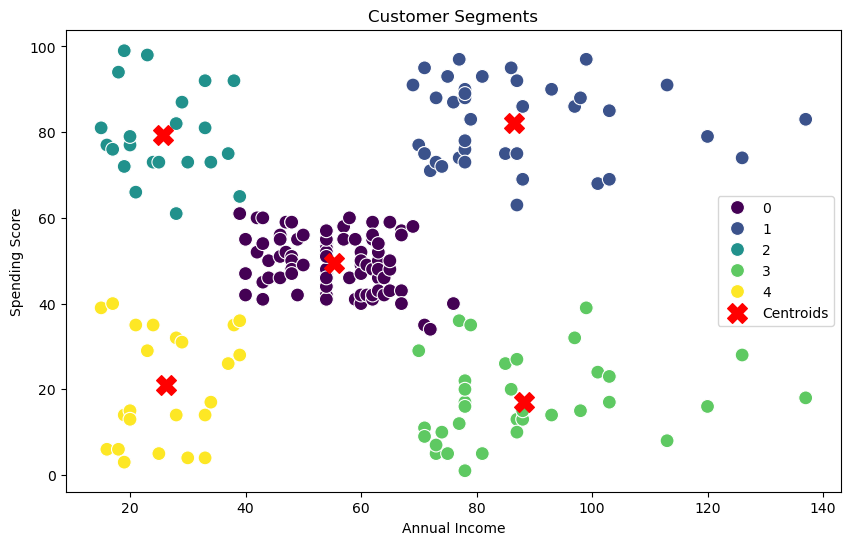

In [30]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis', s=100)

# Plot cluster centers
plt.scatter(centroids[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            centroids[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            c='red', marker='X', s=200, label='Centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.legend()
plt.show()